In [1]:
# numpy and pandas for data manipulation
import sys
import os
# Suppress warnings
import warnings

import matplotlib.pyplot as plt
import networkx as nx

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import cPickle as pickle

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

ROOT = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/'
ROOT_PACKAGE_DIRECTORY = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/collaborative-optimizer'
root_data = ROOT + '/data'

sys.path.append(ROOT_PACKAGE_DIRECTORY)
from experiment_graph.execution_environment import ExecutionEnvironment
from experiment_graph.executor import CollaborativeExecutor
from experiment_graph.workload import Workload


DATABASE_PATH = root_data + '/experiment_graphs/home-credit-default-risk/materialized-no-groupby'
N_ESTIMATOR = 100
from experiment_graph.optimizations.Reuse import LinearTimeReuse
reuse_type=LinearTimeReuse.NAME

In [2]:
# Prepare the Data
# Create Execution Environment with AllMaterializer
ee = ExecutionEnvironment(reuse_type=reuse_type) 
executor = CollaborativeExecutor(ee)

In [3]:
class BaseWorkload(Workload):
    def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')

        train_labels = train['class']
        train = train.drop(columns=['class'])

        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)

        # Random Forest 1 (n_estimator = 10)
        from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
        random_forest10 = RandomForestClassifier(n_estimators=10, random_state=50, verbose=1, n_jobs=-1)
        random_forest10.fit(train, train_labels)

        # Execute
        random_forest10.trained_node.data()

        random_forest10.score(test, test_labels).data(verbose=verbose)
        return True
base_workload = BaseWorkload()
executor.end_to_end_run(workload=base_workload, root_data=root_data, verbose=1)

creating a new root node
creating a new root node


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


executing 9 steps to compute vertex AD4CB332A23AF19C1150A43876F369FD


True

In [4]:
class ReuseMinMaxWorkload(Workload):
     def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')

        train_labels = train['class']
        train = train.drop(columns=['class'])

        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)
        train.data(verbose = verbose)
        return True
min_max_reuse = ReuseMinMaxWorkload()
executor.end_to_end_run(workload=min_max_reuse, root_data=root_data, verbose = 1)

loading root node train.csv{} from history graph
loading root node test.csv{} from history graph
LINEAR TIME REUSE, C2B2A08B3D0EFA08C2A06B7187FF500B
After forward pass mat_set=set(['30BA78B1E3083C85ED55C85637140914', '991F3690053BFE13CEDF335CFB510266', 'C2B2A08B3D0EFA08C2A06B7187FF500B']), warm_set=set([])
After backward pass mat_set=set(['30BA78B1E3083C85ED55C85637140914', '991F3690053BFE13CEDF335CFB510266', 'C2B2A08B3D0EFA08C2A06B7187FF500B']), warm_set=set([])
materialized_vertices: set(['C2B2A08B3D0EFA08C2A06B7187FF500B'])
warmstarting_candidates: set([])
C2B2A08B3D0EFA08C2A06B7187FF500B was copied directly from experiment graph
LINEAR TIME REUSE, C42F2CDE6885202579E291D6BC09DAA6
LINEAR TIME REUSE, 991F3690053BFE13CEDF335CFB510266
LINEAR TIME REUSE, B0B5D94F1B43F18EF00C461EC8EEDFAF
unmaterialize node AD4CB332A23AF19C1150A43876F369FD
unmaterialize node 2CCB1EC7A9FF11E906F0C2558E6A6CFF


True

In [5]:
class ReuseFullWorkload(Workload):
    def run(self, execution_environment, root_data, verbose):
        # Load Data
        train = ee.load(root_data + '/openml/task_id=31/train.csv')
        test = ee.load(root_data + '/openml/task_id=31/test.csv')

        test_labels = test['class']
        test = test.drop('class')
        #test_labels.data()
        train_labels = train['class']
        train = train.drop(columns=['class'])
        
        #train_labels.data()
        from experiment_graph.sklearn_helper.preprocessing import MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler.fit(train)
        train = scaler.transform(train)
        test = scaler.transform(test)

        # Random Forest 1 (n_estimator = 10)
        from experiment_graph.sklearn_helper.ensemble import RandomForestClassifier
        random_forest10 = RandomForestClassifier(n_estimators=10, random_state=50, verbose=1, n_jobs=-1)
        random_forest10.fit(train, train_labels)

        # Execute
        #random_forest10.trained_node.data()
        
        random_forest10.score(test, test_labels).data(verbose=verbose)
        return True

full_workload = ReuseFullWorkload()
executor.end_to_end_run(workload=full_workload, root_data=root_data, verbose = 1)

loading root node train.csv{} from history graph
loading root node test.csv{} from history graph
LINEAR TIME REUSE, AD4CB332A23AF19C1150A43876F369FD
After forward pass mat_set=set(['DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set(['2CCB1EC7A9FF11E906F0C2558E6A6CFF'])
After backward pass mat_set=set(['DBDC4A474E8B084B17D4A95D82CBA082', '30BA78B1E3083C85ED55C85637140914', '1F22A9E7687B4B9E5ED728910FC93F1A', 'C42F2CDE6885202579E291D6BC09DAA6', 'C2B2A08B3D0EFA08C2A06B7187FF500B', 'B0B5D94F1B43F18EF00C461EC8EEDFAF', '991F3690053BFE13CEDF335CFB510266']), warm_set=set(['2CCB1EC7A9FF11E906F0C2558E6A6CFF'])
materialized_vertices: set([])
warmstarting_candidates: set([])
AD4CB332A23AF19C1150A43876F369FD was copied directly from experiment graph
LINEAR TIME REUSE, C42F2CDE6885202579

True

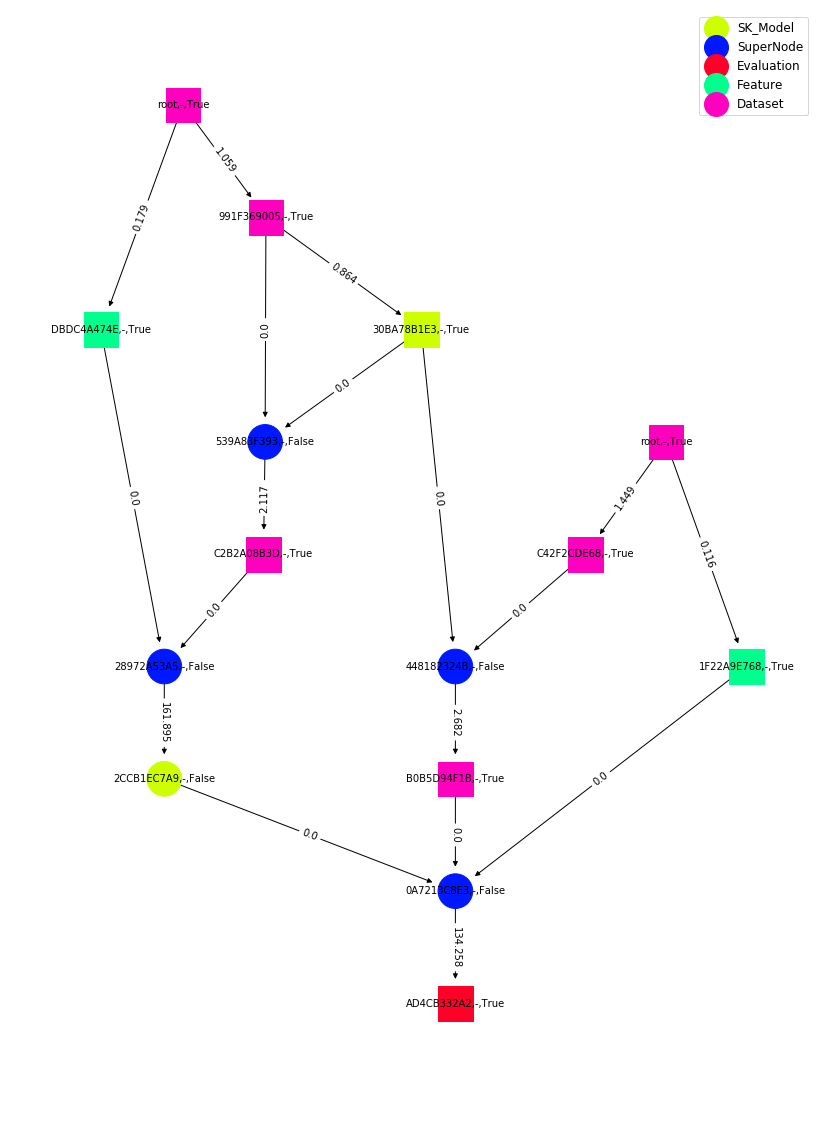

In [6]:
executor.execution_environment.experiment_graph.plot_graph(
    plt,
    figsize=(14, 20),
    labels_for_vertex=['id','mat'],
    labels_for_edges=['execution_time'],
    vertex_size=1200)

In [7]:
graph = executor.execution_environment.experiment_graph.graph

In [8]:
graph.nodes['AD4CB332A23AF19C1150A43876F369FD']['data'].underlying_data

In [9]:
graph.nodes(data='type')


NodeDataView({'AD4CB332A23AF19C1150A43876F369FD': 'Evaluation', '2CCB1EC7A9FF11E906F0C2558E6A6CFF': 'SK_Model', 'DBDC4A474E8B084B17D4A95D82CBA082': 'Feature', 'C2B2A08B3D0EFA08C2A06B7187FF500B': 'Dataset', '539A83F3935BADF7F9842FFABAFE2430': 'SuperNode', '30BA78B1E3083C85ED55C85637140914': 'SK_Model', '1F22A9E7687B4B9E5ED728910FC93F1A': 'Feature', '448182324B46BA67CB20BAD4D5BAB73C': 'SuperNode', '28972A53A5F921894C4B56DA69ECE52F': 'SuperNode', 'C42F2CDE6885202579E291D6BC09DAA6': 'Dataset', 'train.csv{}': 'Dataset', 'B0B5D94F1B43F18EF00C461EC8EEDFAF': 'Dataset', 'test.csv{}': 'Dataset', '991F3690053BFE13CEDF335CFB510266': 'Dataset', '0A7213C8E32C2A311DAF741D6EE50F05': 'SuperNode'}, data='type')